In [4]:
%cd ..

/home/s-uesaka/augment_xgaze


In [5]:
!pwd

/home/s-uesaka/augment_xgaze


# Save random 10 images from xgaze

In [6]:
from notebook_utils import get_normalized_image_and_lm, get_augmented_image_and_lm, get_concat_h, draw_lm, draw_horizontal_line,get_normalized_image_mpii
from pathlib import Path

In [7]:
save_dir = Path("textual_inversion/train_images/xgaze")

In [21]:
for i in range(10):
    image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                            subject_number =95,
                                            image_index = 4,
                                            random_sample=True,
                                            max_image_index=30)
    image.save(save_dir / f"image{i}.png")

/work/jqin/diffusion_iccv/xgaze_512/train/subject0044.h5
Image Index: 21, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0044.h5 CameraIndex: 4
/work/jqin/diffusion_iccv/xgaze_512/train/subject0006.h5
Image Index: 9, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0006.h5 CameraIndex: 10
/work/jqin/diffusion_iccv/xgaze_512/train/subject0059.h5
Image Index: 5, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0059.h5 CameraIndex: 6
/work/jqin/diffusion_iccv/xgaze_512/train/subject0035.h5
Image Index: 26, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0035.h5 CameraIndex: 9
/work/jqin/diffusion_iccv/xgaze_512/train/subject0030.h5
Image Index: 12, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0030.h5 CameraIndex: 13
/work/jqin/diffusion_iccv/xgaze_512/train/subject0029.h5
Image Index: 17, Path: /work/jqin/diffusion_iccv/xgaze_512/train/subject0029.h5 CameraIndex: 18
/work/jqin/diffusion_iccv/xgaze_512/train/subject0105.h5
Image Index: 24, Path: /work/j

# save random 10 MPII

In [46]:

from pathlib import Path
from PIL import Image, ImageDraw
import h5py
import numpy as np

with h5py.File(Path("/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p00.h5"), 'r', libver='latest', swmr=True) as f:
    print(f.keys())
#     image = f['Data']['data'][0].reshape(448,448,3)
#     image = image[:, :, [2, 1, 0]]  # from BGR to RGB
#     image = (np.uint8(image))
#     print(image.shape)
#     image = Image.fromarray(image)

<KeysViewHDF5 ['face_gaze', 'face_head_pose', 'face_patch', 'landmarks']>


In [13]:
save_dir = Path("textual_inversion/train_images/mpii")
for i in range(10):
    image = get_normalized_image_mpii(dataset_dir = Path("/home/jqin/Datasets/MPIIFaceGaze_normalized_h5"),
                                            subject_number =95,
                                            image_index = 4,
                                            random_sample=True,
                                            max_image_index=30)
    image.save(save_dir / f"image{i}.png")

/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p08.h5
Image Index: 4, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p08.h5
/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p03.h5
Image Index: 6, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p03.h5
/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p03.h5
Image Index: 18, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p03.h5
/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p02.h5
Image Index: 20, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p02.h5
/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p10.h5
Image Index: 9, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p10.h5
/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p08.h5
Image Index: 22, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p08.h5
/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p05.h5
Image Index: 24, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p05.h5
/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p09.h5
Image Index: 0, Path: /home/jqin

/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p05.h5
Image Index: 2, Path: /home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p05.h5


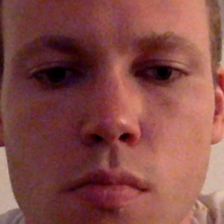

In [12]:
image = get_normalized_image_mpii(dataset_dir = Path("/home/jqin/Datasets/MPIIFaceGaze_normalized_h5"),
                                        subject_number =95,
                                        image_index = 4,
                                        random_sample=True,
                                        max_image_index=30)
image

In [10]:
for i in range(10):
    image, lm = get_normalized_image_and_lm(dataset_dir = Path("/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p00.h5"),
                                            subject_number =95,
                                            image_index = 4,
                                            random_sample=True,
                                            max_image_index=30)
    image.save(save_dir / f"image{i}.png")

NotADirectoryError: [Errno 20] Not a directory: '/home/jqin/Datasets/MPIIFaceGaze_normalized_h5/p00.h5'

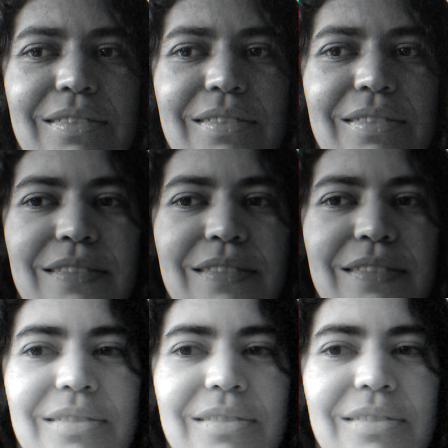

In [44]:
image

In [10]:
from transformers import CLIPTextModel, CLIPTokenizer


In [11]:
from generate_augmented_dataset import ImageAugmentor

In [12]:
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    DiffusionPipeline,
    DPMSolverMultistepScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
)

In [13]:
augmentor = ImageAugmentor(depth2image_model_path="stabilityai/stable-diffusion-2-depth",
                           text_encoder_model_path= "/home/s-uesaka/augment_xgaze/textual_inversion/model_output")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_1561533/633038109.py:1 in <module>                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_1561533/633038109.py'                       │
│                                                                                                  │
│ /home/s-uesaka/augment_xgaze/generate_augmented_dataset.py:167 in __init__                       │
│                                                                                                  │
│   164 │   │   │   │   │   │   │   │   │   │   torch_dtype=torch.float16,                         │
│   165 │   │   │   │   │   │   │   │   │   ).to("cuda")                                           │
│   166 │   │   else:                                                                              │
│ ❱ 167 │   │   │   text_encoder = CLIPTextModel.from_pretrained(                                  │
│   168 │   │   │   │   text_encoder_model_path, subfolder="text_encoder"                          │
│   169 │   │   │   )                                                                              │
│   170 │   │   │   self.depth2image_model = StableDiffusionDepth2ImgPipeline.from_pretrained(     │
│                                                                                                  │
│ /home/s-uesaka/miniconda3/envs/augment_xgaze_new/lib/python3.10/site-packages/transformers/model │
│ ing_utils.py:2079 in from_pretrained                                                             │
│                                                                                                  │
│   2076 │   │   # Load config if we don't provide a configuration                                 │
│   2077 │   │   if not isinstance(config, PretrainedConfig):                                      │
│   2078 │   │   │   config_path = config if config is not None else pretrained_model_name_or_pat  │
│ ❱ 2079 │   │   │   config, model_kwargs = cls.config_class.from_pretrained(                      │
│   2080 │   │   │   │   config_path,                                                              │
│   2081 │   │   │   │   cache_dir=cache_dir,                                                      │
│   2082 │   │   │   │   return_unused_kwargs=True,                                                │
│                                                                                                  │
│ /home/s-uesaka/miniconda3/envs/augment_xgaze_new/lib/python3.10/site-packages/transformers/model │
│ s/clip/configuration_clip.py:134 in from_pretrained                                              │
│                                                                                                  │
│   131 │   @classmethod                                                                           │
│   132 │   def from_pretrained(cls, pretrained_model_name_or_path: Union[str, os.PathLike], **k   │
│   133 │   │                                                                                      │
│ ❱ 134 │   │   config_dict, kwargs = cls.get_config_dict(pretrained_model_name_or_path, **kwarg   │
│   135 │   │                                                                                      │
│   136 │   │   # get the text config dict if we are loading from CLIPConfig                       │
│   137 │   │   if config_dict.get("model_type") == "clip":                                        │
│                                                                                                  │
│ /home/s-uesaka/miniconda3/envs/augment_xgaze_new/lib/python3.10/site-packages/transformers/confi │
│ guration_utils.py:565 in get_config_dict                                                         │
│                                                            

In [ ]:
image, lm = get_normalized_image_and_lm(dataset_dir = Path("/work/jqin/diffusion_iccv/xgaze_512/train"),
                                        subject_number =95,
                                        image_index = 4,
                                        random_sample=False,
                                        max_image_index=30)

In [ ]:
image

In [8]:
augmentor.generate_augmentated_image(image, lm, stablediffusion_config={'prompt': "<MPII>", "negative_prompt": "", "seed": 0, "scale": 9, "steps": 50, "strength": 0.7})

  0%|          | 0/35 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_1821381/4046324589.py:1 in <module>                                               │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_1821381/4046324589.py'                      │
│                                                                                                  │
│ /home/s-uesaka/augment_xgaze/generate_augmented_dataset.py:187 in generate_augmentated_image     │
│                                                                                                  │
│   184 │   │                                                                                      │
│   185 │   │   self.generator.manual_seed(stablediffusion_config['seed'])                         │
│   186 │   │                                                                                      │
│ ❱ 187 │   │   generated_image = self.depth2image_model(image = image,                            │
│   188 │   │   │   │   │   │   │   │   │   │   │   │   prompt = stablediffusion_config['prompt'   │
│   189 │   │   │   │   │   │   │   │   │   │   │   │   negative_prompt = stablediffusion_config   │
│   190 │   │   │   │   │   │   │   │   │   │   │   │   guidance_scale = stablediffusion_config[   │
│                                                                                                  │
│ /home/s-uesaka/miniconda3/envs/augment_xgaze_new/lib/python3.10/site-packages/torch/autograd/gra │
│ d_mode.py:27 in decorate_context                                                                 │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /home/s-uesaka/miniconda3/envs/augment_xgaze_new/lib/python3.10/site-packages/diffusers/pipeline │
│ s/stable_diffusion/pipeline_stable_diffusion_depth2img.py:650 in __call__                        │
│                                                                                                  │
│   647 │   │   │   │   latent_model_input = torch.cat([latent_model_input, depth_mask], dim=1)    │
│   648 │   │   │   │                                                                              │
│   649 │   │   │   │   # predict the noise residual                                               │
│ ❱ 650 │   │   │   │   noise_pred = self.unet(latent_model_input, t, encoder_hidden_states=prom   │
│   651 │   │   │   │                                                                              │
│   652 │   │   │   │   # perform guidance                                                         │
│   653 │   │   │   │   if do_classifier_free_guidance:                                            │
│                                                                                                  │
│ /home/s-uesaka/miniconda3/envs/augment_xgaze_new/lib/python3.10/site-packages/torch/nn/modules/m │
│ odule.py:1190 in _call_impl                                                                      │
│                                                            